In [19]:
import pandas as pd
# Memuat dataset
df = pd.read_csv('students.csv')
# Menampilkan 5 baris pertama dataset
df.head()

,Nama,Usia,Jenis Kelamin,Jurusan,Matematika,IPA,Bahasa Inggris
0,Alice,20,Perempuan,Informatika,85,90,78
1,Bob,21,Laki -laki,Informatika,82,88,74
2,Charlie,22,Laki -laki,Sistem Informasi,91,85,89
3,Daisy,20,Perempuan,Sistem Informasi,78,80,84
4,Eve,21,Perempuan,Informatika,90,92,88


In [20]:
# Memeriksa ukuran dataset
print(f"Ukuran dataset: {df.shape}")
# Memeriksa tipe data setiap kolom
print(df.dtypes)
# Memeriksa nilai yang hilang
print(df.isnull().sum())
# Deskripsi statistik dasar
print(df.describe(include='all'))

Ukuran dataset: (5, 7)
Nama              object
Usia               int64
Jenis Kelamin     object
Jurusan           object
Matematika         int64
IPA                int64
Bahasa Inggris     int64
dtype: object
Nama              0
Usia              0
Jenis Kelamin     0
Jurusan           0
Matematika        0
IPA               0
Bahasa Inggris    0
dtype: int64
         Nama      Usia Jenis Kelamin     Jurusan   Matematika        IPA  \
count       5   5.00000             5            5    5.000000   5.000000   
unique      5       NaN             2            2         NaN        NaN   
top     Alice       NaN     Perempuan  Informatika         NaN        NaN   
freq        1       NaN             3            3         NaN        NaN   
mean      NaN  20.80000           NaN          NaN   85.200000  87.000000   
std       NaN   0.83666           NaN          NaN    5.449771   4.690416   
min       NaN  20.00000           NaN          NaN   78.000000  80.000000   
25%       NaN  20.0

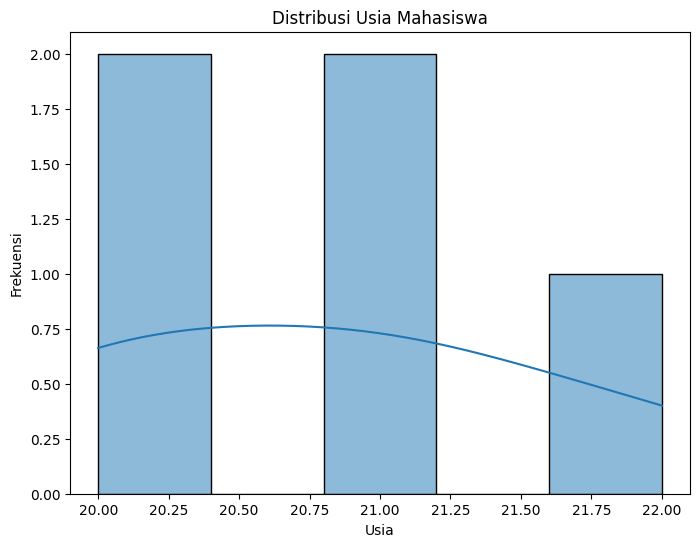

In [21]:
# Distribusi Usia: Mari kita visualisasikan distribusi usia mahasiswa.
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram untuk distribusi usia
plt.figure(figsize=(8, 6))
sns.histplot(df['Usia'], bins=5, kde=True)
plt.title('Distribusi Usia Mahasiswa')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

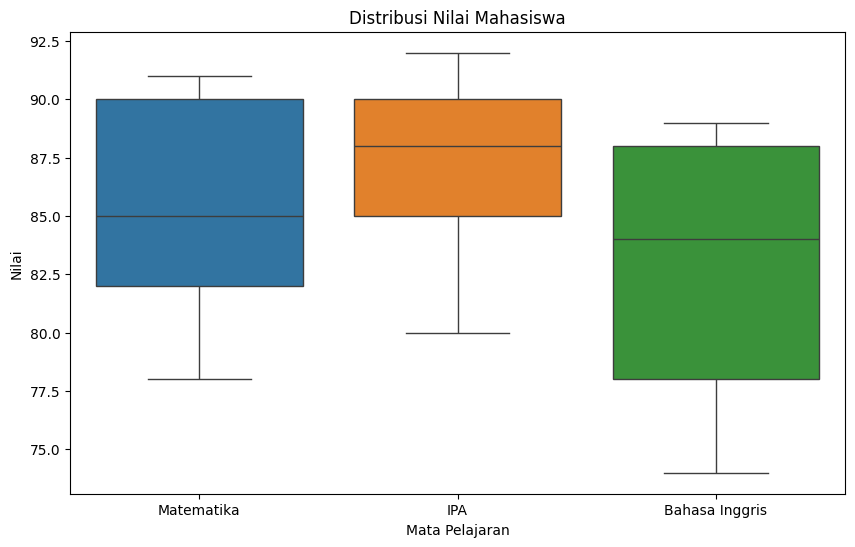

In [22]:
# Distribusi Nilai: Visualisasikan distribusi nilai untuk setiap mata pelajaran.
# Boxplot untuk nilai setiap mata pelajaran
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Matematika', 'IPA', 'Bahasa Inggris']])
plt.title('Distribusi Nilai Mahasiswa')
plt.xlabel('Mata Pelajaran')
plt.ylabel('Nilai')
plt.show()

Kolom dalam dataset setelah parsing: Index(['Nama', 'Usia', 'Jenis Kelamin', 'Jurusan ', 'Matematika', 'IPA',
       'Bahasa Inggris'],
      dtype='object')
      Nama  Usia Jenis Kelamin           Jurusan   Matematika  IPA  \
0    Alice    20     Perempuan        Informatika          85   90   
1      Bob    21    Laki -laki        Informatika          82   88   
2  Charlie    22    Laki -laki  Sistem Informasi           91   85   
3    Daisy    20     Perempuan  Sistem Informasi           78   80   
4      Eve    21     Perempuan        Informatika          90   92   

   Bahasa Inggris  
0              78  
1              74  
2              89  
3              84  
4              88  
Jumlah data setelah pembersihan: (5, 7)


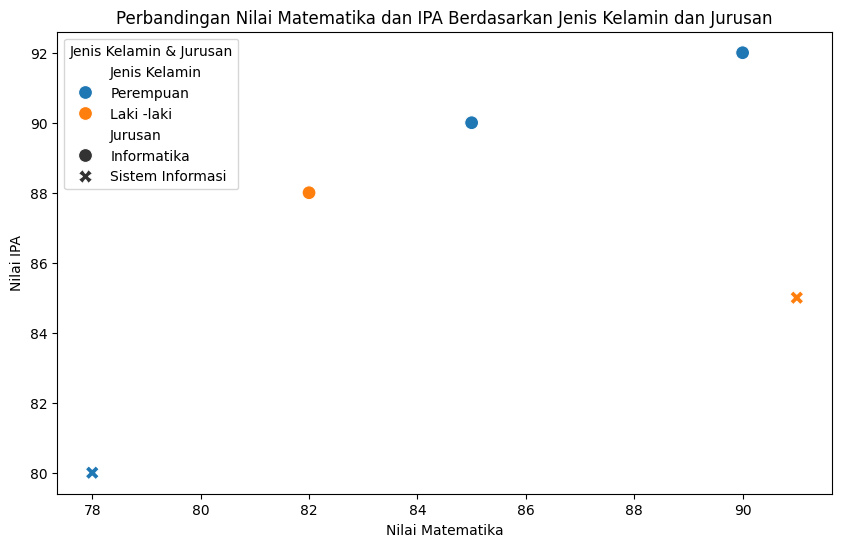

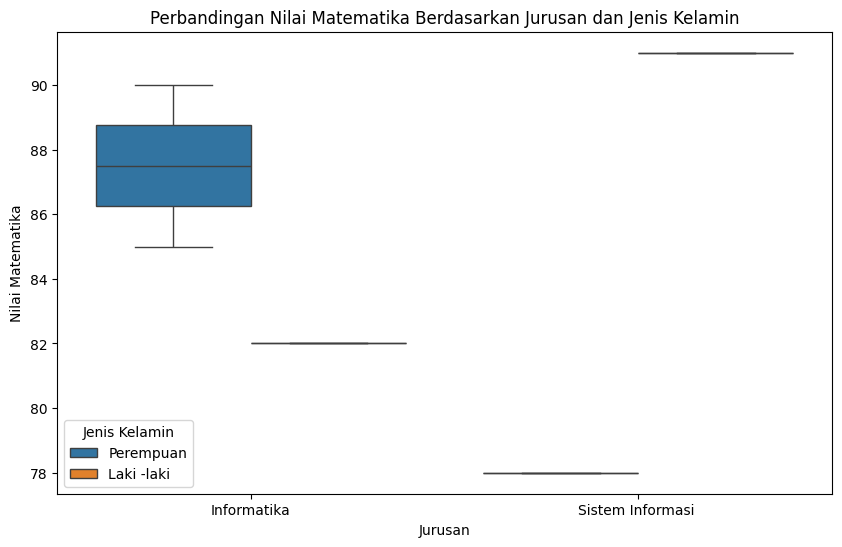

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset dengan delimiter otomatis
df = pd.read_csv('students.csv', sep=None, engine='python', encoding='utf-8-sig')

# Debug: Cek apakah kolom sudah terbaca dengan benar
print("Kolom dalam dataset setelah parsing:", df.columns)
print(df.head())  # Menampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar

# Hapus spasi berlebih pada nama kolom
df.columns = df.columns.str.strip()

# Pastikan kolom yang diperlukan ada dalam dataset
required_columns = ['Matematika', 'IPA', 'Jenis Kelamin', 'Jurusan']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}")
else:
    # Pastikan kolom 'Matematika' dan 'IPA' bertipe numerik
    df['Matematika'] = pd.to_numeric(df['Matematika'], errors='coerce')
    df['IPA'] = pd.to_numeric(df['IPA'], errors='coerce')

    # Hapus baris dengan nilai NaN pada kolom Matematika, IPA, Jenis Kelamin, dan Jurusan
    df.dropna(subset=['Matematika', 'IPA', 'Jenis Kelamin', 'Jurusan'], inplace=True)

    # Debug: Pastikan dataset tidak kosong setelah pembersihan
    print("Jumlah data setelah pembersihan:", df.shape)

    # Scatter plot untuk perbandingan nilai berdasarkan jenis kelamin dan jurusan
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Matematika', y='IPA', hue='Jenis Kelamin', style='Jurusan',
        data=df, s=100
    )
    plt.title("Perbandingan Nilai Matematika dan IPA Berdasarkan Jenis Kelamin dan Jurusan")
    plt.xlabel("Nilai Matematika")
    plt.ylabel("Nilai IPA")
    plt.legend(title="Jenis Kelamin & Jurusan")
    plt.show()

    # Boxplot untuk perbandingan nilai berdasarkan jurusan
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Jurusan', y='Matematika', hue='Jenis Kelamin', data=df)
    plt.title("Perbandingan Nilai Matematika Berdasarkan Jurusan dan Jenis Kelamin")
    plt.xlabel("Jurusan")
    plt.ylabel("Nilai Matematika")
    plt.show()
